<a href="https://colab.research.google.com/github/taufiksatrian/freeCodeCamp-Machine-Learning-with-Python/blob/main/Convolutional-Neural-Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network**

### **Convolutional Neural Network**

**Deep Computer Vision**
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

**Image Data**

These 3 dimensions are as follows:
- Image Height
- Image Width
- Color Channels

**Convoltional Neural Network**


### **The Convolutional Layer**

### **Creating a Convolutional Neural Network**

**Dataset**

*CIFAR Image Dataset* it contions 60.000 32x32 color images with 6000 images of each class
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [1]:
# Import 
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Load and Split Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['ariplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


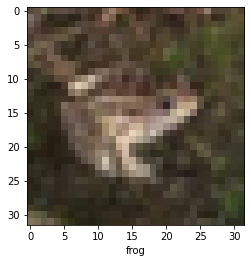

In [3]:
# Look at one Image
IMG_INDEX = 22

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**CNN Architecture**

Convolutional Base

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

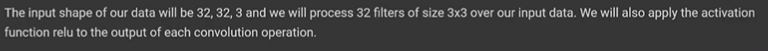

**Layer 2**

image.png

**Other Layers**

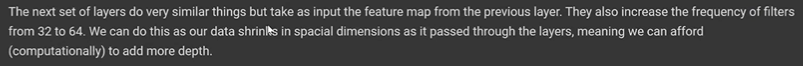

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

**Adding Dense Layers**

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

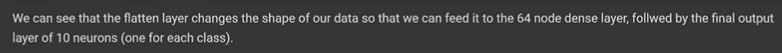

**Training**

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 98s 61ms/step - loss: 1.5239 - accuracy: 0.4453 - val_loss: 1.2618 - val_accuracy: 0.5405
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1512 - accuracy: 0.5918 - val_loss: 1.1014 - val_accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0037 - accuracy: 0.6482 - val_loss: 0.9709 - val_accuracy: 0.6572
Epoch 4/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.8959 - accuracy: 0.6870 - val_loss: 0.8952 - val_accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.8212 - accuracy: 0.7138 - val_loss: 0.8811 - val_accuracy: 0.6919
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7619 - accuracy: 0.7338 - val_loss: 0.9248 - val_accuracy: 0.6832
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7148 - accuracy: 0.7495 - val_loss: 0.864

### **Evaluating the Model**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8876 - accuracy: 0.7133 - 4s/epoch - 12ms/step
0.7132999897003174


**Working with Small Datasets**

*Data Augmentation*

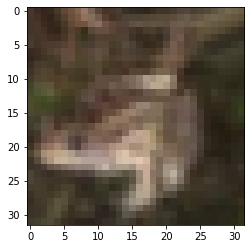

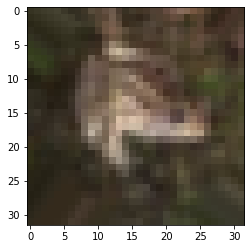

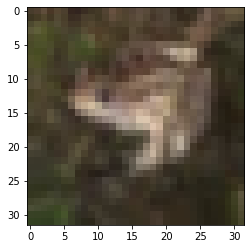

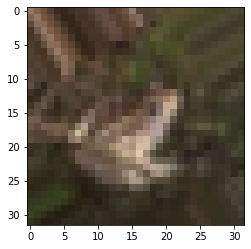

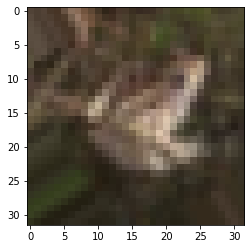

In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import keras.utils as image # Stackoverflow

# Create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Pick an images to transform
test_img = train_images[22]
img = image.img_to_array(test_img) # COnvert image to numpy array 
img = img.reshape((1,) + img.shape) # Reshape image

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

*Pretrained Models*

*Fine Tuning*

**Using a Pretrained Model**

In [37]:
# Import
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

Dataset

In [18]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Spilt the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True,
)

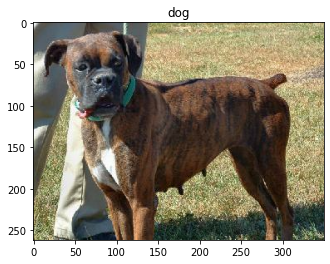

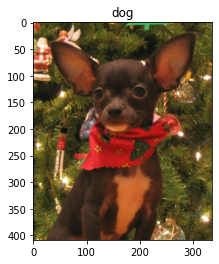

In [20]:
get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Data Preprocessing

In [22]:
IMG_SIZE =160 # All images will be resixed to 160x160

def format_example(image, label):
  """
  return an image that is reshapes to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Apply this function to all our images using map

In [23]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at out images now

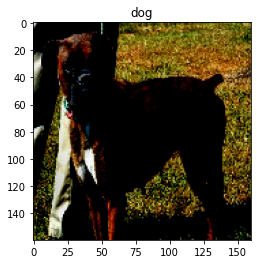

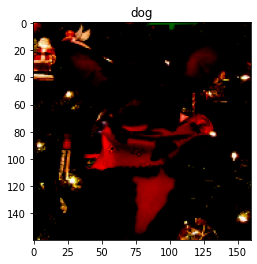

In [24]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

finally we shuffle and batch the images

In [27]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of original image vs the new image we will see it has beesn changed

In [28]:
for img, label in raw_train.take(2):
  print("Origin shape: ", img.shape)
for img, label in train.take(2):
  print("Now Shape: ", img.shape)


Origin shape:  (262, 350, 3)
Origin shape:  (409, 336, 3)
Now Shape:  (160, 160, 3)
Now Shape:  (160, 160, 3)


**Picking a Pretrained Model**

In [29]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the the pre-trained model MobilNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

At this point this base_model will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [32]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


**Freezing the Base**

The term freezing refers to disabling the training property of a layer. it simply means we wont make any changes to the weights of any layers that are froxen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [33]:
base_model.trainable = False

In [34]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

**Adding our Classifier**

Now that we have our base layer setup we can add the classifier. Instead of flattening the future map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.

In [35]:
global_avarage_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally we will add the prediction layer that will be a single dense neuron. we can do this because we only have two classes to predict for.

In [38]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model

In [39]:
model = tf.keras.Sequential([
    base_model,
    global_avarage_layer,
    prediction_layer
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


**Training the Model**

Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it

In [44]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 14s 613ms/step - loss: 0.8450 - accuracy: 0.4437


In [46]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 408s 691ms/step - loss: 0.2373 - accuracy: 0.8889 - val_loss: 0.0943 - val_accuracy: 0.9656
Epoch 2/3
582/582 [==============================] - 361s 617ms/step - loss: 0.0743 - accuracy: 0.9746 - val_loss: 0.0673 - val_accuracy: 0.9759
Epoch 3/3
582/582 [==============================] - 360s 616ms/step - loss: 0.0586 - accuracy: 0.9789 - val_loss: 0.0588 - val_accuracy: 0.9789
[0.8889306783676147, 0.9745835661888123, 0.9788823127746582]


In [47]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5")

**Object Detection**

### **Full Code**